In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("car_price_dataset.csv")

# 1. Mostrem les 10 primeres línies
print(df.head(10))

        Brand     Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia       Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet    Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes       GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi        Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   286618   
5      Toyota     Camry  2007          2.7    Petrol       Automatic   157889   
6       Honda     Civic  2010          3.4  Electric       Automatic   139584   
7         Kia  Sportage  2001          4.7  Electric  Semi-Automatic   157495   
8         Kia  Sportage  2014          2.6    Hybrid          Manual    98700   
9      Toyota      RAV4  2005          3.1    Petrol          Manual   107724   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4       

In [16]:
print(f"Longitud del dataset {len(df)}")

Longitud del dataset 10000


In [17]:
# Procedemos a borrar cualquier campo que sea un null y volvemos a comprobar si la longitud del dataset a cambiado o no
df_clean = df.dropna()
print(f"Longitud del dataset después de eliminar los valores nulos {len(df)}")

Longitud del dataset después de eliminar los valores nulos 10000


In [12]:
# Valor medio, máximo y mínimo del precio
print("Precio medio:", df_clean['Price'].mean())
print("Precio máximo:", df_clean['Price'].max())
print("Precio mínimo:", df_clean['Price'].min())

Precio medio: 8852.9644
Precio máximo: 18301
Precio mínimo: 2000


In [13]:
# Estadísticas de otras variables numéricas (por ejemplo, Mileage)
print("Kilometraje medio:", df_clean['Mileage'].mean())

Kilometraje medio: 149239.1118


In [3]:
# Estadísticas descriptivas de variables numéricas
display(df.describe())

# Si quieres ver estadísticas descriptivas de variables categóricas:
display(df.describe(include=['object']))


,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


,Brand,Model,Fuel_Type,Transmission
count,10000,10000,10000,10000
unique,10,30,4,3
top,Ford,Accord,Electric,Manual
freq,1048,365,2625,3372


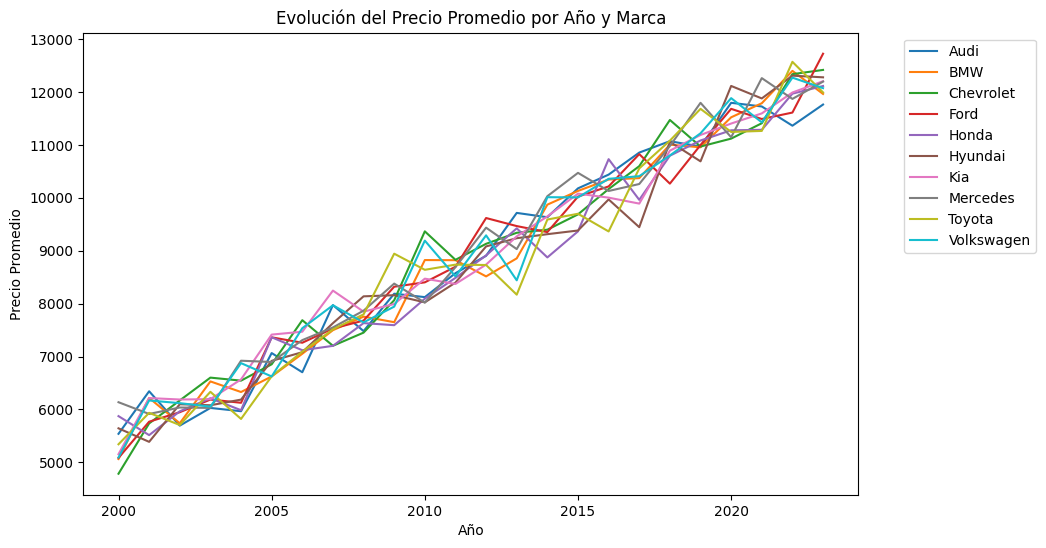

In [10]:
# Precio promedio por año y marca
df_year_brand = df.groupby(['Year', 'Brand'])['Price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=df_year_brand, x='Year', y='Price', hue='Brand')
plt.title("Evolución del Precio Promedio por Año y Marca")
plt.xlabel("Año")
plt.ylabel("Precio Promedio")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [11]:
brand_stats = df.groupby('Brand')['Price'].agg(['mean','median','min','max']).round(2)
print(brand_stats)


               mean  median   min    max
Brand                                   
Audi        8929.37  8917.0  2000  18255
BMW         8704.07  8741.0  2000  17386
Chevrolet   9015.68  9038.0  2000  17661
Ford        8852.57  8775.5  2000  18017
Honda       8665.60  8624.0  2000  17906
Hyundai     8778.28  8755.0  2000  17871
Kia         8880.09  8914.0  2000  17630
Mercedes    8980.09  9142.0  2000  17614
Toyota      8798.18  8726.0  2000  18301
Volkswagen  8928.38  8976.0  2000  16461


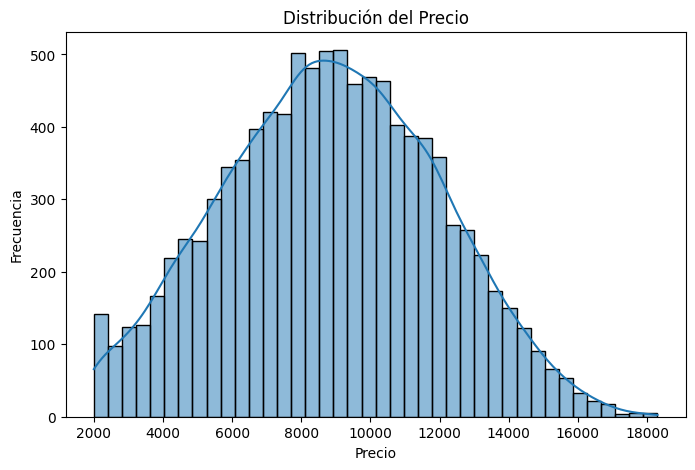

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Price'], kde=True)
plt.title("Distribución del Precio")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

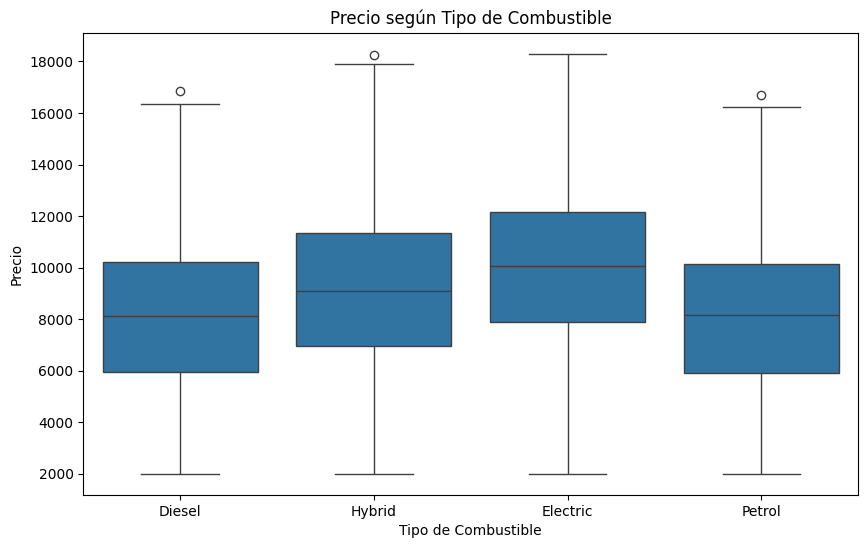

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df_clean)
plt.title("Precio según Tipo de Combustible")
plt.xlabel("Tipo de Combustible")
plt.ylabel("Precio")
plt.show()

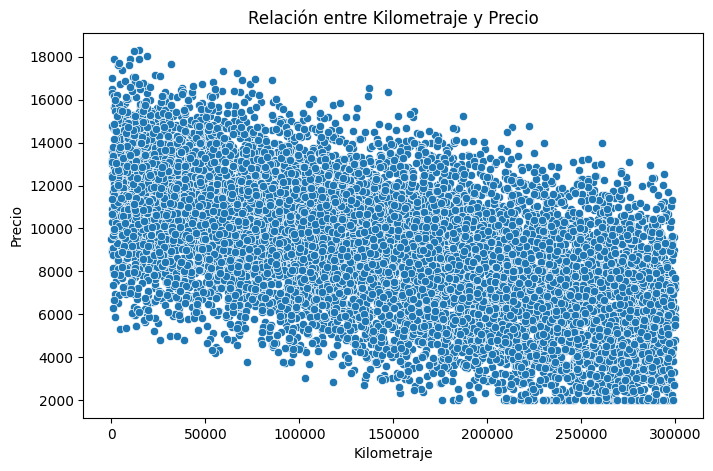

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Mileage', y='Price', data=df_clean)
plt.title("Relación entre Kilometraje y Precio")
plt.xlabel("Kilometraje")
plt.ylabel("Precio")
plt.show()


In [18]:
# Precio promedio por marca
avg_price_brand = df_clean.groupby('Brand')['Price'].mean().sort_values(ascending=False)
print(avg_price_brand)

Brand
Chevrolet     9015.683948
Mercedes      8980.087049
Audi          8929.373796
Volkswagen    8928.377451
Kia           8880.086066
Ford          8852.570611
Toyota        8798.184536
Hyundai       8778.279397
BMW           8704.068068
Honda         8665.596630
Name: Price, dtype: float64


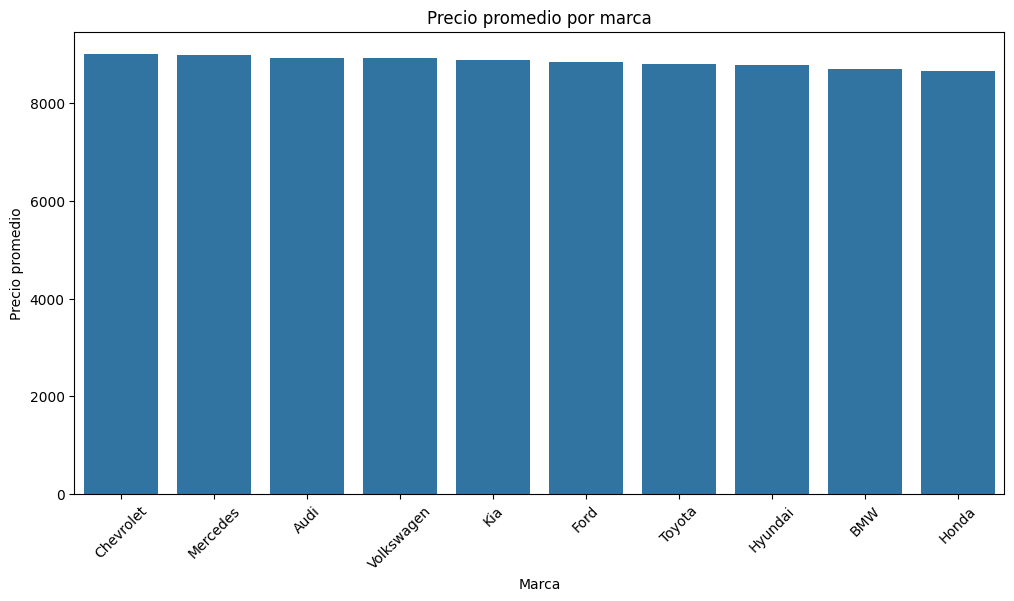

In [19]:
# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_brand.index, y=avg_price_brand.values)
plt.xticks(rotation=45)
plt.title("Precio promedio por marca")
plt.xlabel("Marca")
plt.ylabel("Precio promedio")
plt.show()

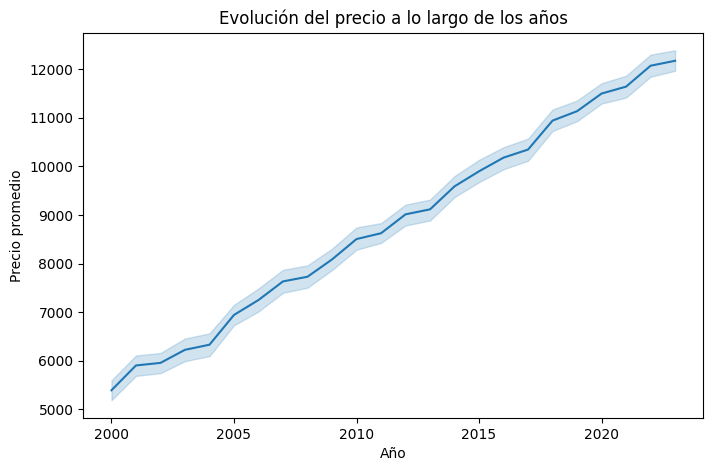

In [19]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Year', y='Price', data=df_clean, estimator='mean')
plt.title("Evolución del precio a lo largo de los años")
plt.xlabel("Año")
plt.ylabel("Precio promedio")
plt.show()


In [20]:
df_bmw = df[df['Brand'] == 'BMW']
print("Número de registros de BMW:", len(df_bmw))
df_bmw.head()


Número de registros de BMW: 999


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
10,BMW,5 Series,2013,1.3,Hybrid,Automatic,296824,2,3,5863
27,BMW,3 Series,2017,2.3,Electric,Semi-Automatic,142701,5,3,10645
28,BMW,3 Series,2020,4.7,Electric,Semi-Automatic,210767,3,3,12584
41,BMW,5 Series,2007,4.9,Petrol,Manual,120491,2,1,8690
55,BMW,3 Series,2011,2.9,Electric,Semi-Automatic,281020,3,5,6679


In [22]:
print("Estadísticas descriptivas de los BMW:")
print(df_bmw.describe())

# Si quieres estadísticas también de las columnas categóricas:
print("\nEstadísticas categóricas de los BMW:")



Estadísticas descriptivas de los BMW:
              Year  Engine_Size        Mileage       Doors  Owner_Count  \
count   999.000000   999.000000     999.000000  999.000000   999.000000   
mean   2011.116116     2.976877  149980.309309    3.468468     2.830831   
std       6.856863     1.119564   85794.541811    1.103264     1.427756   
min    2000.000000     1.000000     178.000000    2.000000     1.000000   
25%    2005.000000     2.000000   76012.500000    3.000000     2.000000   
50%    2011.000000     2.900000  152396.000000    3.000000     3.000000   
75%    2017.000000     3.900000  223116.500000    4.000000     4.000000   
max    2023.000000     5.000000  299371.000000    5.000000     5.000000   

              Price  
count    999.000000  
mean    8704.068068  
std     3110.670391  
min     2000.000000  
25%     6562.000000  
50%     8741.000000  
75%    11064.000000  
max    17386.000000  

Estadísticas categóricas de los BMW:


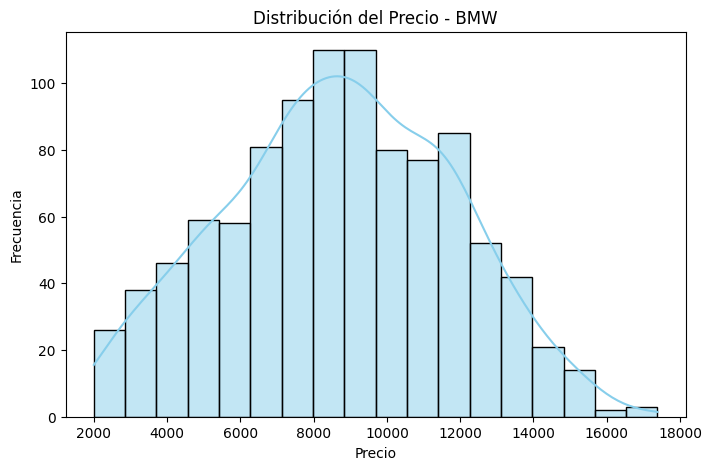

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data=df_bmw, x='Price', kde=True, color='skyblue')
plt.title("Distribución del Precio - BMW")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()


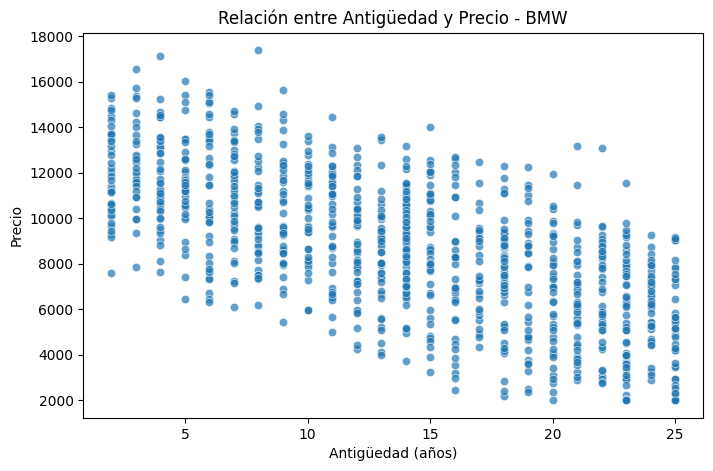

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_bmw, x='car_age', y='Price', alpha=0.7)
plt.title("Relación entre Antigüedad y Precio - BMW")
plt.xlabel("Antigüedad (años)")
plt.ylabel("Precio")
plt.show()

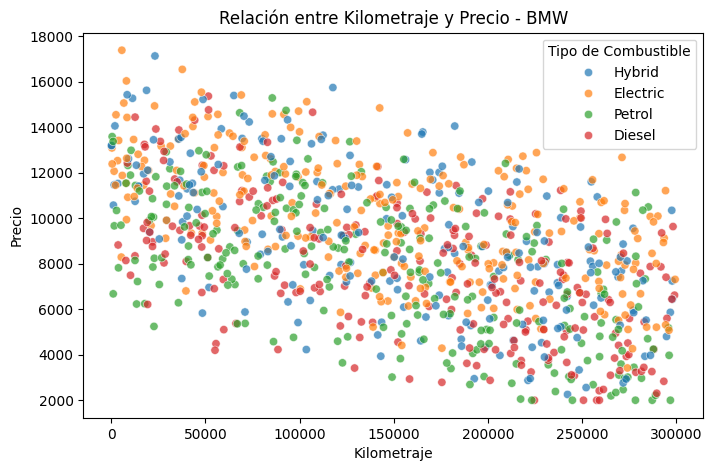

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_bmw, x='Mileage', y='Price', alpha=0.7, hue='Fuel_Type')
plt.title("Relación entre Kilometraje y Precio - BMW")
plt.xlabel("Kilometraje")
plt.ylabel("Precio")
plt.legend(title="Tipo de Combustible")
plt.show()


/tmp/ipykernel_83/1118763036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bmw, x='Owner_Count', y='Price', palette='Set2')


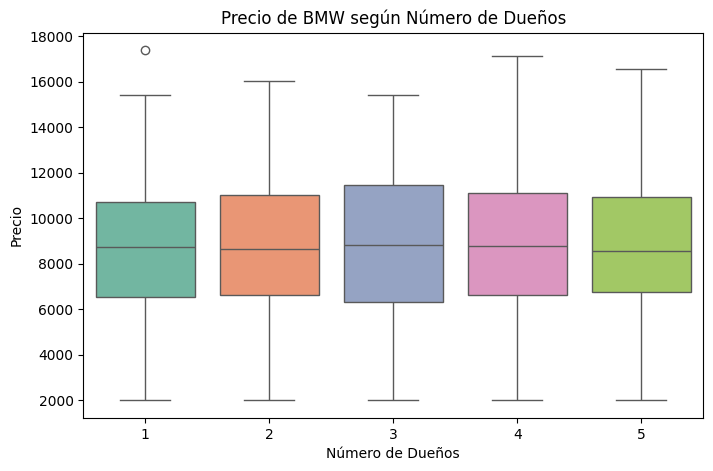

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_bmw, x='Owner_Count', y='Price', palette='Set2')
plt.title("Precio de BMW según Número de Dueños")
plt.xlabel("Número de Dueños")
plt.ylabel("Precio")
plt.show()
